In [14]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Seaborn is a Python data visualization library based on matplotlib
import seaborn as sns
%matplotlib inline
import math

In [158]:
file='202412_CochesLimpio.csv'
df = pd.read_csv(file, delimiter=';', low_memory=False)
df_or = df.copy()
df.shape
#os.getcwd()
print(df.head())

  Pais          Marca       Modelo  Precio  Kilometros Automatico/Manual  \
0    E  mercedes-benz  Desconocido   41500       10298            Manual   
1    E  mercedes-benz          220   30000       15000            Manual   
2    E  mercedes-benz          190  155000        9000     0 Transmision   
3    E  mercedes-benz          220   24900       89000     0 Transmision   
4    E  mercedes-benz          220   44900       71800     0 Transmision   

  Fabricacion Combustible   kW   CV  
0  1935-01-01    Gasolina   29   39  
1  1952-01-01    Gasolina   78  106  
2  1958-12-01    Gasolina   81  110  
3  1962-09-01    Gasolina  120  163  
4  1963-09-01    Gasolina  120  163  


In [16]:
# explorar el data set

df.describe()

,Precio,Kilometros,kW,CV
count,8.614340e+05,8.614340e+05,861434.000000,861434.000000
mean,3.031531e+04,9.758026e+04,120.897264,164.445592
std,1.355549e+06,1.439838e+05,88.019854,119.654259
min,1.000000e+00,0.000000e+00,0.000000,0.000000
25%,8.900000e+03,2.700000e+04,74.000000,101.000000
50%,1.698700e+04,8.200000e+04,100.000000,136.000000
75%,2.899000e+04,1.485000e+05,136.000000,185.000000
max,1.000000e+09,1.000000e+08,9550.000000,12984.000000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 861434 entries, 0 to 861433
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Pais               861434 non-null  object
 1   Marca              861434 non-null  object
 2   Modelo             861434 non-null  object
 3   Precio             861434 non-null  int64 
 4   Kilometros         861434 non-null  int64 
 5   Automatico/Manual  861434 non-null  object
 6   Fabricacion        861434 non-null  object
 7   Combustible        861434 non-null  object
 8   kW                 861434 non-null  int64 
 9   CV                 861434 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 65.7+ MB


In [18]:
df.head()

,Pais,Marca,Modelo,Precio,Kilometros,Automatico/Manual,Fabricacion,Combustible,kW,CV
0,E,mercedes-benz,Desconocido,41500,10298,Manual,1935-01-01,Gasolina,29,39
1,E,mercedes-benz,220,30000,15000,Manual,1952-01-01,Gasolina,78,106
2,E,mercedes-benz,190,155000,9000,0 Transmision,1958-12-01,Gasolina,81,110
3,E,mercedes-benz,220,24900,89000,0 Transmision,1962-09-01,Gasolina,120,163
4,E,mercedes-benz,220,44900,71800,0 Transmision,1963-09-01,Gasolina,120,163


In [19]:
df.isnull().sum()

Pais                 0
Marca                0
Modelo               0
Precio               0
Kilometros           0
Automatico/Manual    0
Fabricacion          0
Combustible          0
kW                   0
CV                   0
dtype: int64

In [20]:
for col in df.select_dtypes(include=['object']).columns:
    print(f"Unique values in {col}: {df[col].nunique()}")
    print(df[col].unique())

Unique values in Pais: 8
['E' 'B' 'D' 'F' 'NL' 'A' 'I' 'L']
Unique values in Marca: 234
['mercedes-benz' 'bmw' 'audi' 'porsche' 'volkswagen' 'toyota' 'ferrari'
 'mini' 'ford' 'volvo' 'abarth' 'ac' 'aiways' 'aixam' 'alfa romeo'
 'alpina' 'alpine' 'ariel motor' 'aston martin' 'austin' 'austin-healey'
 'autobianchi' 'baic' 'bentley' 'borgward' 'bristol' 'brute' 'bugatti'
 'buick' 'byd' 'cadillac' 'caravans-wohnm' 'carver' 'caterham' 'cenntro'
 'chatenet' 'chery' 'chevrolet' 'chrysler' 'citroen' 'corvette' 'cupra'
 'dacia' 'daewoo' 'daf' 'daihatsu' 'daimler' 'dangel' 'dfsk' 'dodge'
 'donkervoort' 'ds automobiles' 'embuggy' 'estrima' 'fiat' 'fisker' 'gaz'
 'gmc' 'goupil' 'grecav' 'honda' 'hummer' 'hyundai' 'ineos' 'infiniti'
 'innocenti' 'iso rivolta' 'isuzu' 'iveco' 'jac' 'jaguar' 'jeep' 'jensen'
 'kg mobility' 'kia' 'ktm' 'lada' 'lamborghini' 'lancia' 'land rover'
 'leapmotor' 'lexus' 'ligier' 'lincoln' 'lotus' 'lynk & co' 'man'
 'maserati' 'maxus' 'maybach' 'mazda' 'mclaren' 'mercury' 'm

In [21]:
def tipo_variables(df):
    dtypes = df.dtypes
    categorical_cols = []
    numerical_cols = []
    for col, dtype in dtypes.items():
        if pd.api.types.is_numeric_dtype(dtype):
            numerical_cols.append(col)
        else:
            categorical_cols.append(col)
    return numerical_cols, categorical_cols
    
vbles = tipo_variables(df)
num_vbles =vbles[0]
cat_vbles = vbles[1]

print(cat_vbles)
print(num_vbles)

['Pais', 'Marca', 'Modelo', 'Automatico/Manual', 'Fabricacion', 'Combustible']
['Precio', 'Kilometros', 'kW', 'CV']


In [22]:
def plot_numerical(df):
    numerical_cols=tipo_variables(df)[0]
    a= math.floor(math.sqrt(len(numerical_cols)))+1
    fig, axes = plt.subplots(a, a, figsize=(25,25))
    axes = axes.flatten()
    i = 0
    for t in numerical_cols:
        ax = sns.histplot(data=df, x=t, bins=20,  ax=axes[i])
        i +=1

def plot_numericalBox(df):
    import math
    import scipy.stats as stats
    
    #a= math.floor(math.sqrt(len(num_vbles)))+1
    num_vbles=tipo_variables(df)[0]
    fig, axes = plt.subplots(math.floor(len(num_vbles)/3)+1,3, figsize=(25,25))
    axes = axes.flatten()
    i = 0
    for i, t in enumerate(num_vbles):
        transformed_data, _ = stats.boxcox(df[t] + 1)  # Se suma 1 para evitar valores negativos/cero
        sns.boxplot(y=transformed_data, ax=axes[i])  # Boxplot en orientación vertical
        axes[i].set_title(f"Box-Cox de {t}")
    plt.tight_layout()
    plt.show()

def plot_categorial(df):
    categorical_cols=tipo_variables(df)[1]
    a= math.floor(math.sqrt(len(categorical_cols)))+1
    #fig, axes = plt.subplots(a, a, figsize=(25,25))
    fig, axes = plt.subplots(len(categorical_cols), 1, figsize=(20,160))
    axes = axes.flatten()
    i = 0
    for t in categorical_cols:
        ax = sns.countplot(x=t, data=df, ax=axes[i])
        i +=1
    

#### Descriptiva variables numericas

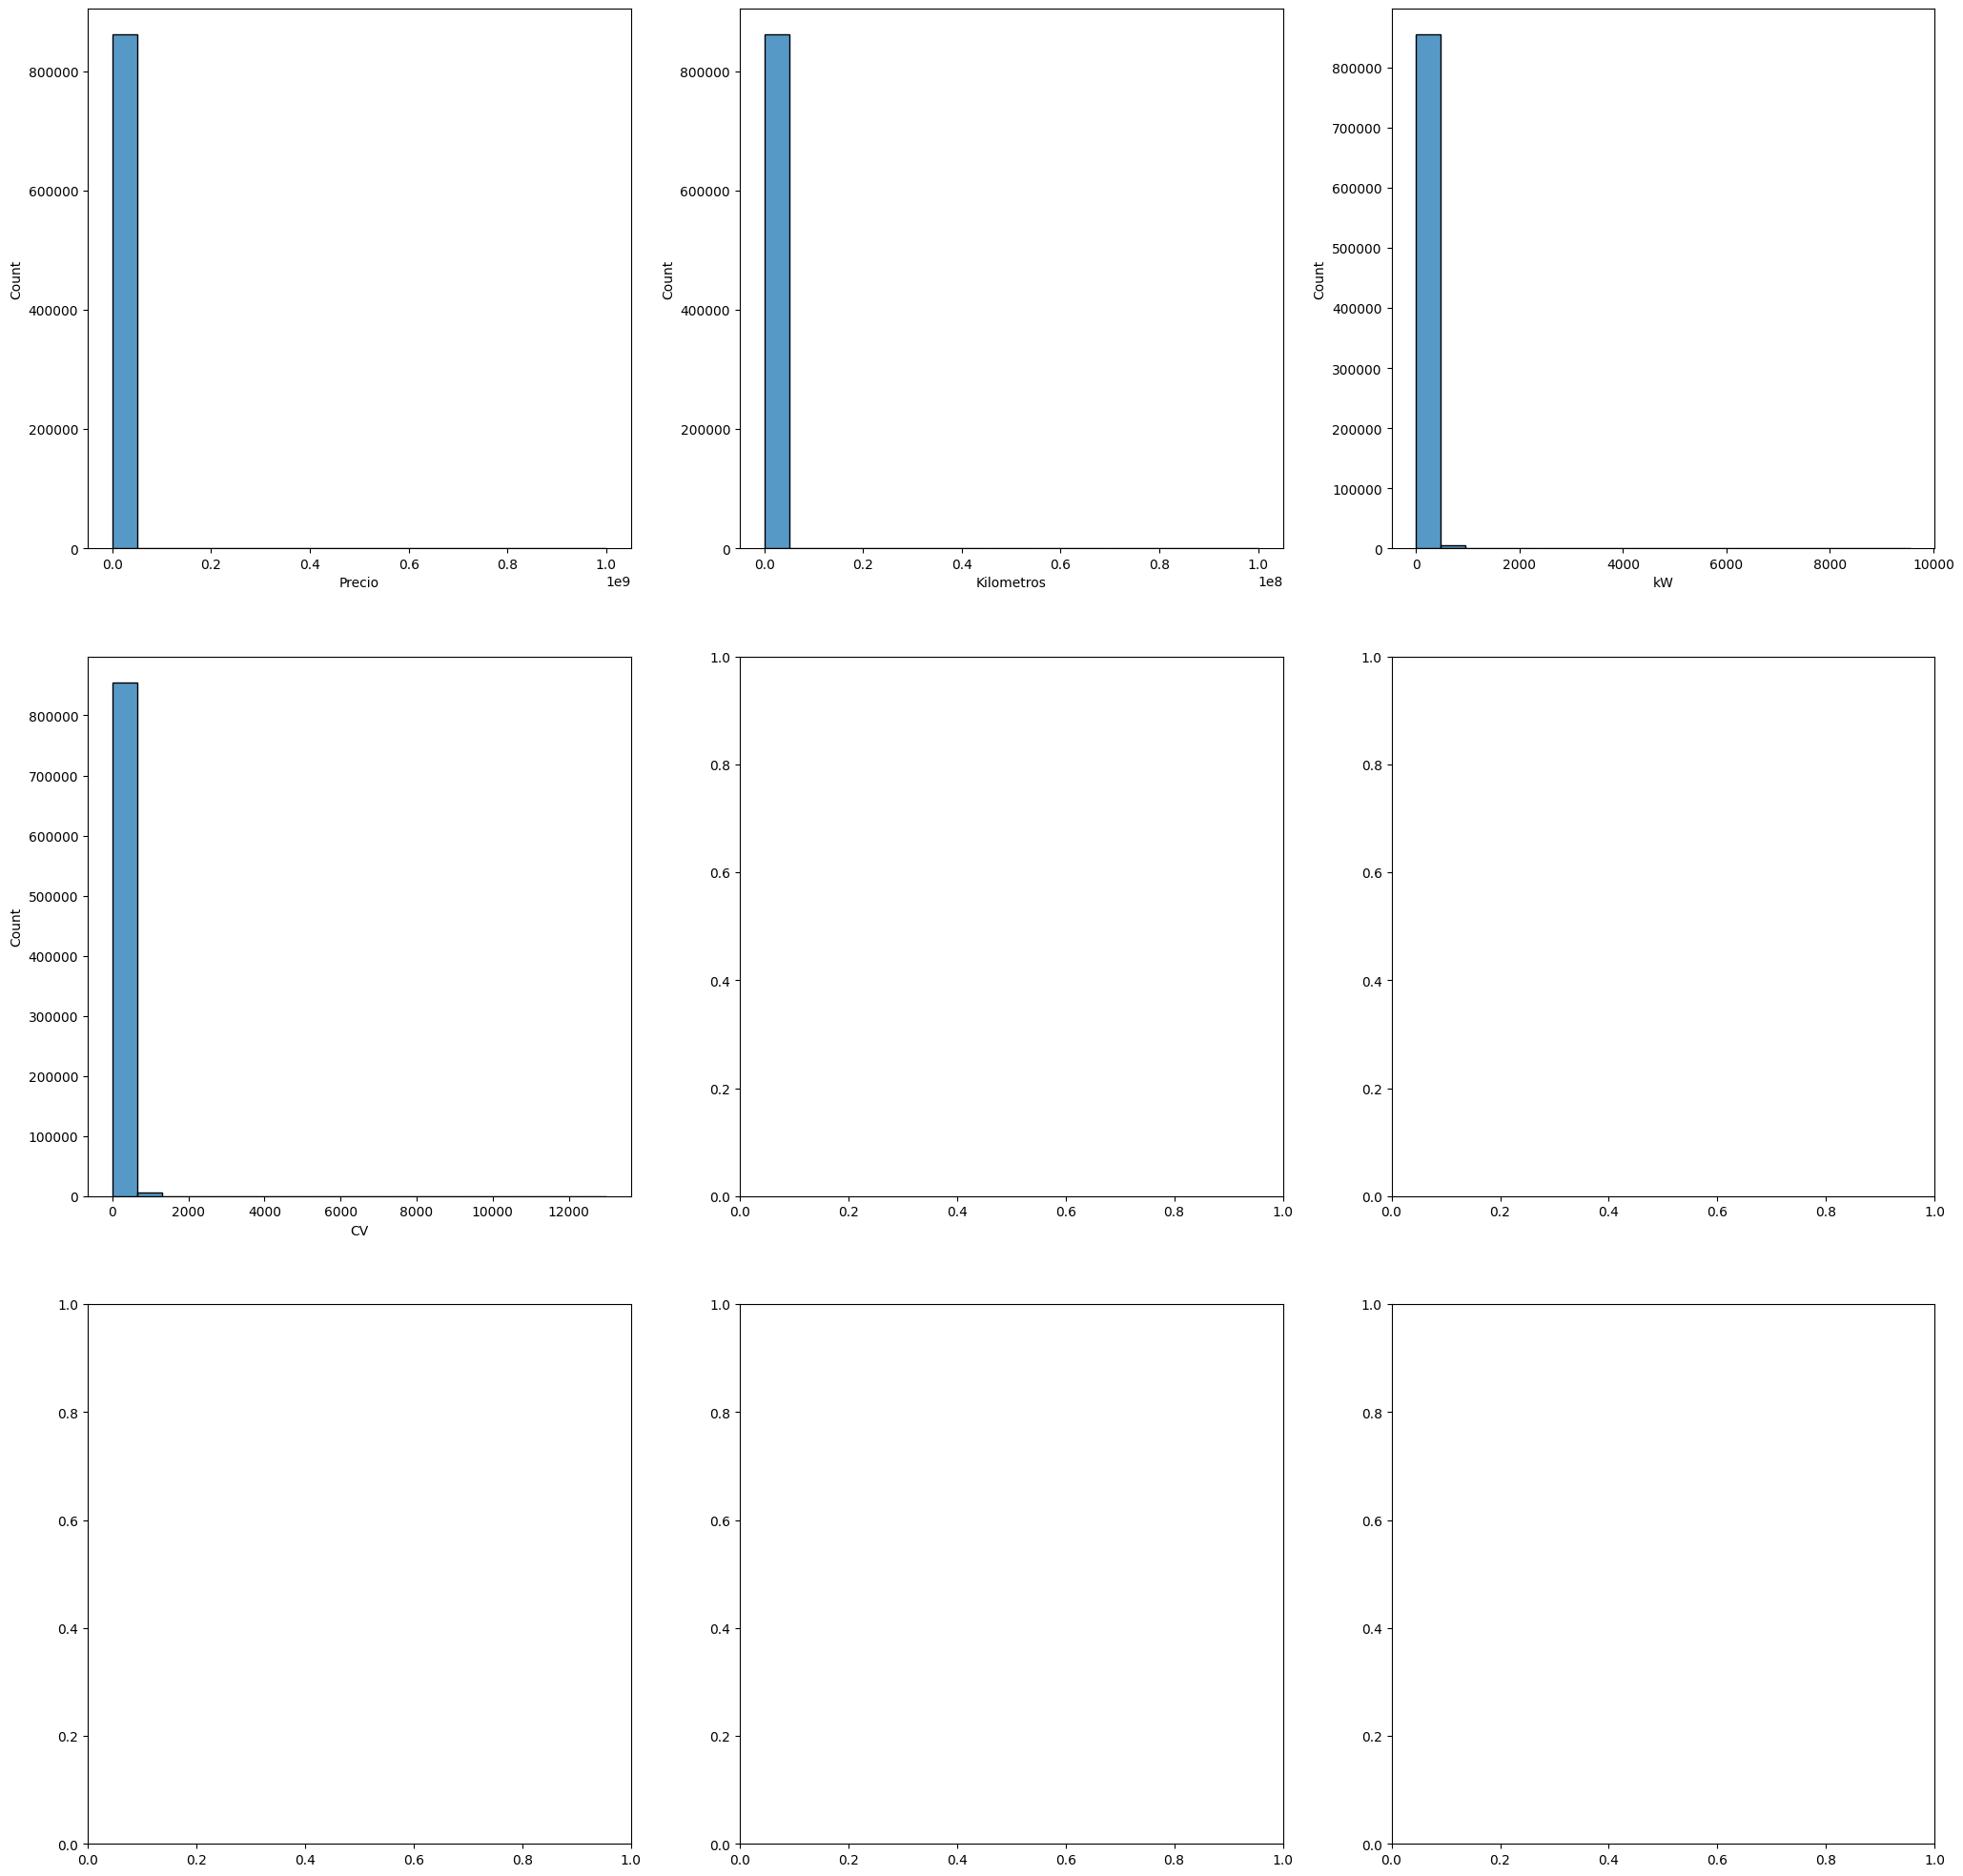

In [23]:
plot_numerical(df)

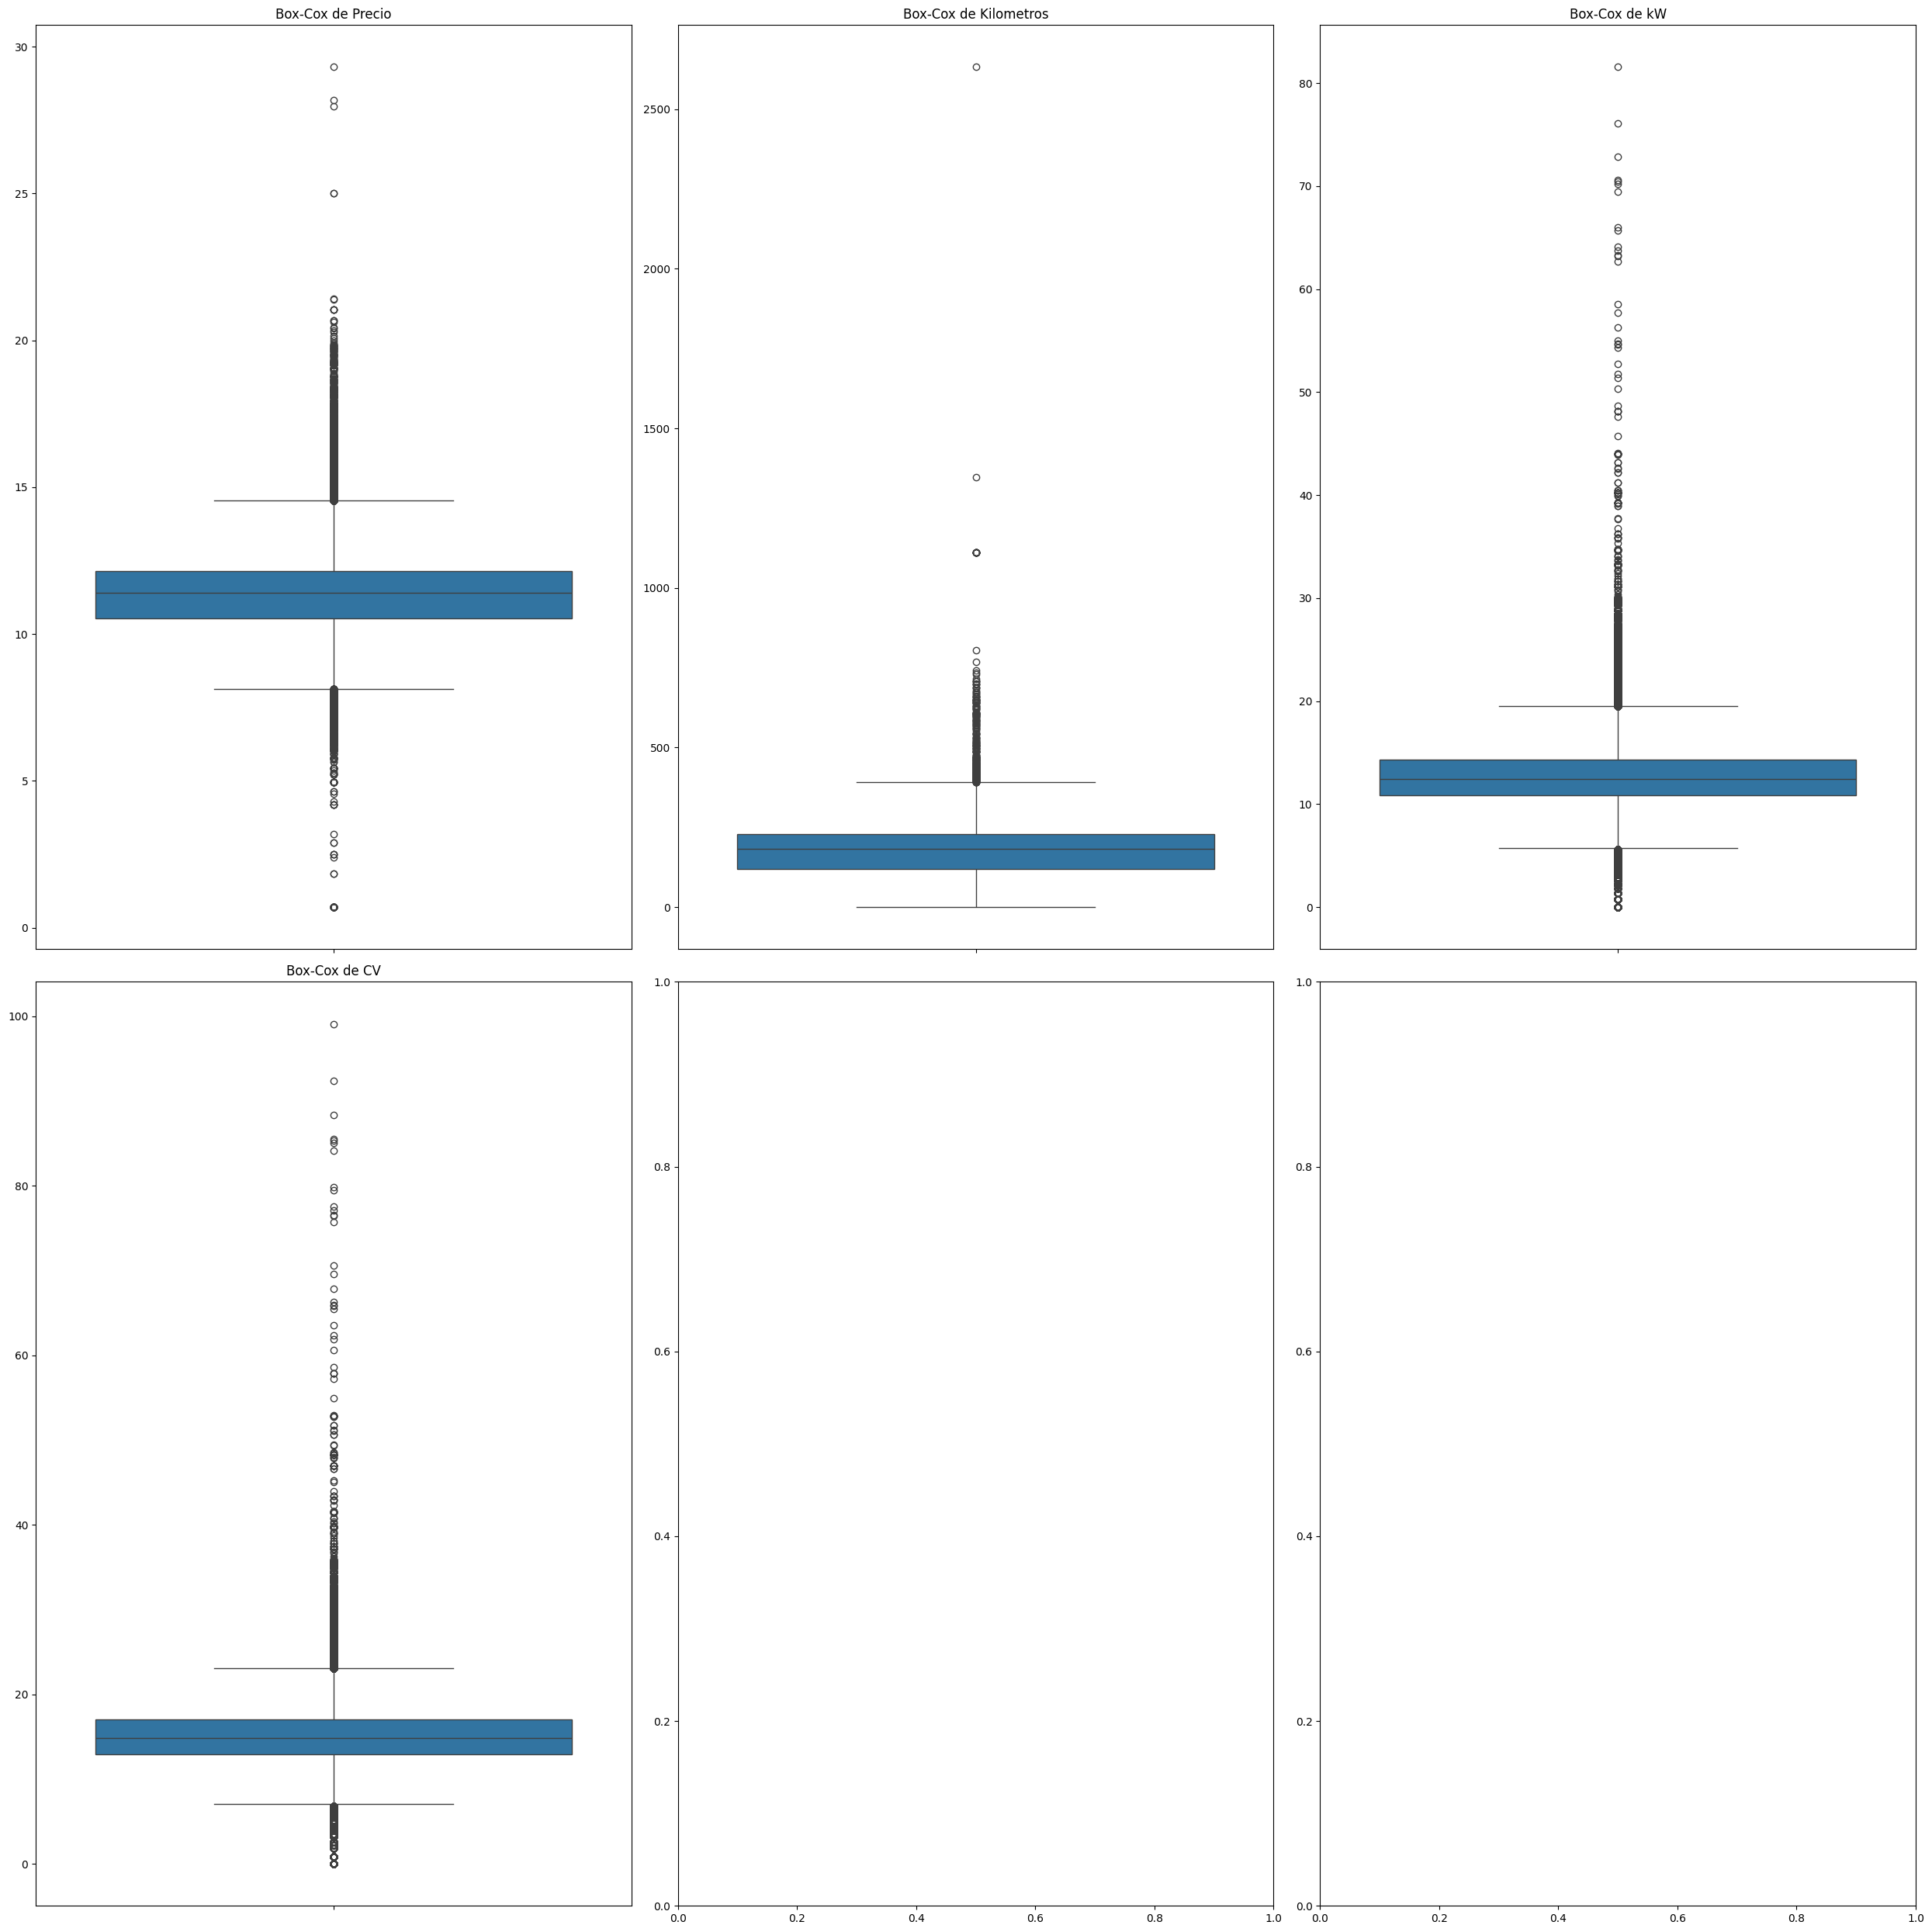

In [24]:
plot_numericalBox(df)

#### Heatmap

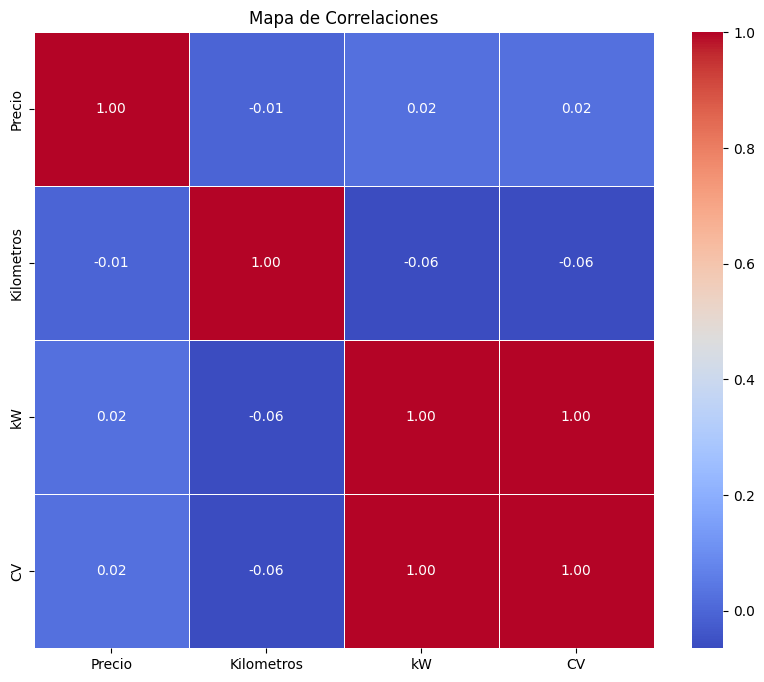

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular matriz de correlación
corr_matrix = df[num_vbles].corr()

#  Generar el heatmap de correlaciones
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Mapa de Correlaciones")
plt.show()


#### Descritpivo variables categoricas

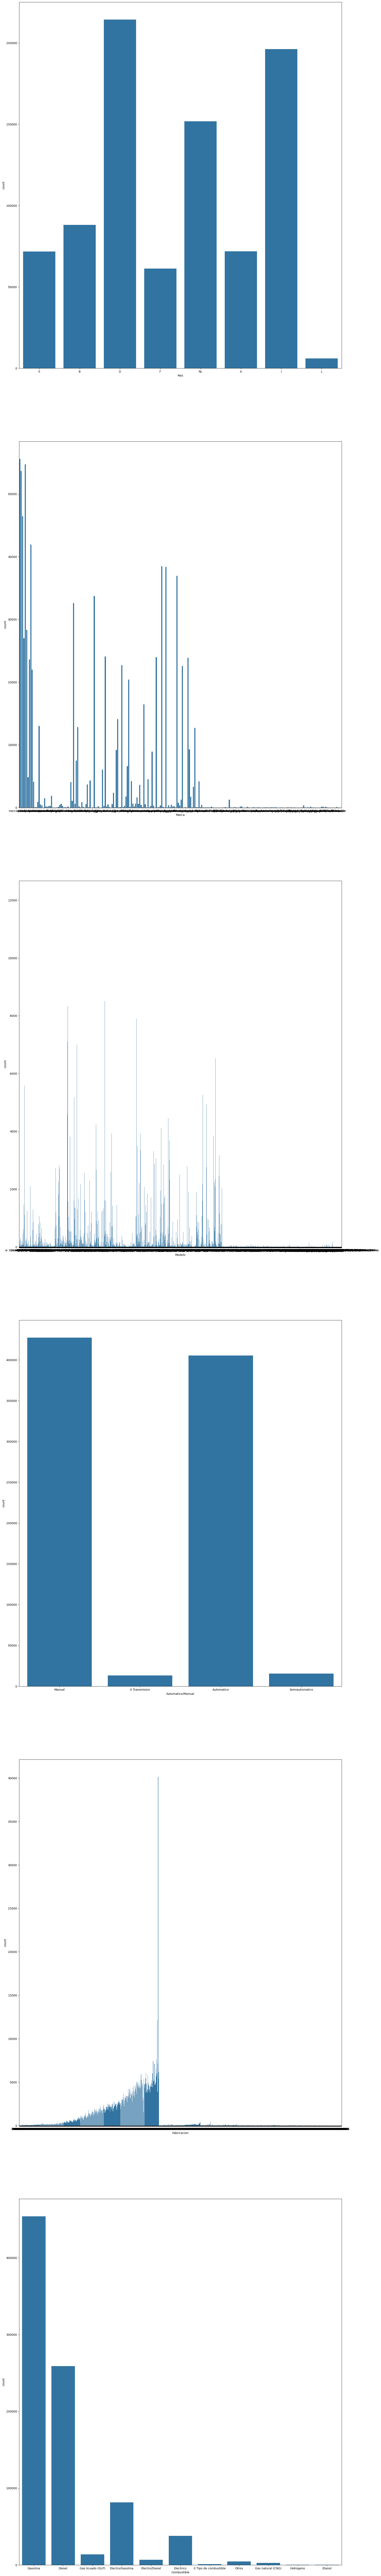

In [26]:
plot_categorial(df)

#### Análisis de Frecuencias

In [27]:
df.nunique().sort_values()

Automatico/Manual         4
Pais                      8
Combustible              11
Marca                   234
CV                      749
kW                      749
Fabricacion            1036
Modelo                 2830
Precio                37942
Kilometros           177020
dtype: int64

In [28]:
for col in cat_vbles:

    print(f"\nDistribución de los valores de la variable '{col}':")

    display(pd.DataFrame({

    'valor': df[col].value_counts(dropna=False).index,

    'frecuencia': df[col].value_counts(dropna=False).values,

    'porcentaje': (df[col].value_counts(normalize=True, dropna=False).values * 100).round(2)

    }))


Distribución de los valores de la variable 'Pais':


,valor,frecuencia,porcentaje
0,D,214424,24.89
1,I,196145,22.77
2,NL,151844,17.63
3,B,88125,10.23
4,A,71896,8.35
5,E,71777,8.33
6,F,61283,7.11
7,L,5940,0.69



Distribución de los valores de la variable 'Marca':


,valor,frecuencia,porcentaje
0,mercedes-benz,55611,6.46
1,volkswagen,54728,6.35
2,bmw,53665,6.23
3,audi,46471,5.39
4,ford,41940,4.87
...,...,...,...
229,aurus,1,0.00
230,martin,1,0.00
231,lifan,1,0.00
232,mp lafer,1,0.00



Distribución de los valores de la variable 'Modelo':


,valor,frecuencia,porcentaje
0,golf,12068,1.40
1,Desconocido,9814,1.14
2,qashqai,9461,1.10
3,corsa,8948,1.04
4,clio,8695,1.01
...,...,...,...
2825,340 r,1,0.00
2826,01 *phev 7.2kw my22*,1,0.00
2827,01 *phev 7.2kw my22*',1,0.00
2828,bolero,1,0.00



Distribución de los valores de la variable 'Automatico/Manual':


,valor,frecuencia,porcentaje
0,Manual,427436,49.62
1,Automatico,405286,47.05
2,Semiautomatico,15565,1.81
3,0 Transmision,13147,1.53



Distribución de los valores de la variable 'Fabricacion':


,valor,frecuencia,porcentaje
0,2024-12-01,40137,4.66
1,2024-01-01,12129,1.41
2,2024-03-01,7615,0.88
3,2023-06-01,7419,0.86
4,2024-06-01,7119,0.83
...,...,...,...
1031,1942-04-01,1,0.00
1032,1947-11-01,1,0.00
1033,1935-10-01,1,0.00
1034,1951-03-01,1,0.00



Distribución de los valores de la variable 'Combustible':


,valor,frecuencia,porcentaje
0,Gasolina,454218,52.73
1,Diesel,258866,30.05
2,Electro/Gasolina,81599,9.47
3,Electrico,37770,4.38
4,Gas licuado (GLP),13799,1.60
5,Electro/Diesel,6789,0.79
6,Otros,4635,0.54
7,Gas natural (CNG),2508,0.29
8,0 Tipo de combustible,993,0.12
9,Hidrogeno,133,0.02


In [29]:
import pandas as pd

#  Seleccionar las 20 marcas más frecuentes
top_brands = df['Marca'].value_counts().nlargest(50).index

# Filtrar el dataframe con solo las marcas más frecuentes
df_filtered = df[df['Marca'].isin(top_brands)]

# Crear la pivot table con métricas de agregación
pivot_table = df_filtered.pivot_table(index='Marca', 
                                      aggfunc={'Precio': ['mean', 'median', 'count']})

# Mostrar la tabla resultante
print(pivot_table)

               Precio                         
                count           mean    median
Marca                                         
abarth           4096   20809.113770   18500.0
alfa romeo      12998   24249.380905   18900.0
aston martin     1472  218452.999321  149900.0
audi            46471   27560.424609   19990.0
bentley          1847  170663.079047  159990.0
bmw             53665   27169.971583   18990.0
chevrolet        4041   22432.016580    6500.0
chrysler         1066   14106.472795    6500.0
citroen         32610   13492.404232   11499.0
cupra            7497   33792.684140   31730.0
dacia           12824   13706.163989   12999.0
dodge            3680   55294.498098   48212.5
dr automobiles   1267   18216.254933   17400.0
ds automobiles   4298   25178.402280   23990.0
ferrari          4847  324555.616257  249900.0
fiat            33722   11809.724957    9988.0
ford            41940   17894.825656   13489.5
honda            6014   19125.737945   16580.0
hyundai      

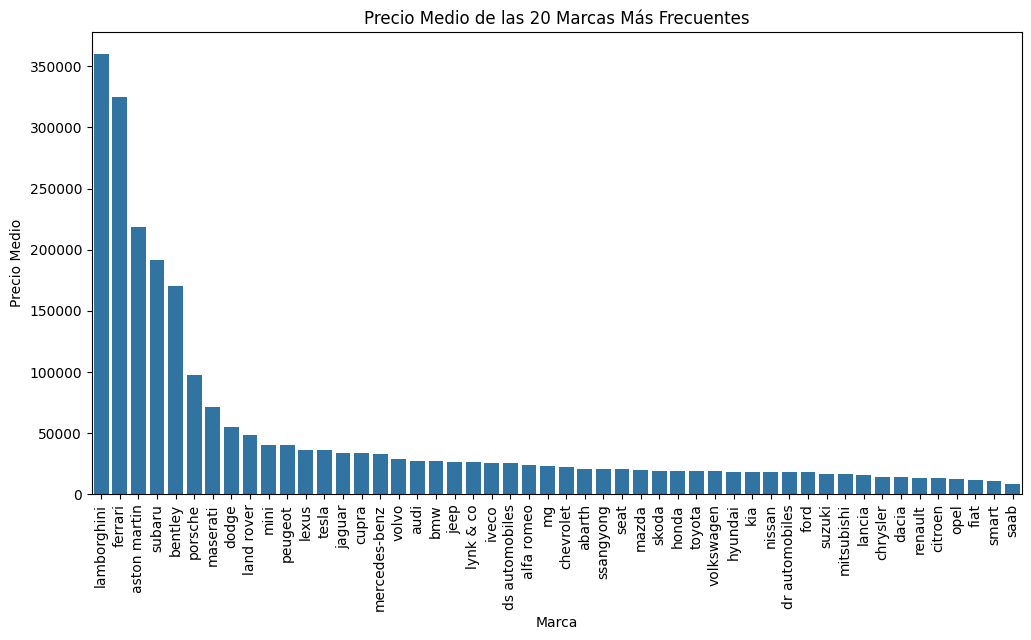

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ordenar la tabla por precio medio de mayor a menor
pivot_table_sorted = pivot_table.sort_values(("Precio", "mean"), ascending=False)
pivot_table_sorted
# Generar el plot de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=pivot_table_sorted, x=pivot_table_sorted.index, y=("Precio", "mean"))

# Ajustes del gráfico
plt.xticks(rotation=90)
plt.ylabel("Precio Medio")
plt.xlabel("Marca")
plt.title("Precio Medio de las 20 Marcas Más Frecuentes")

plt.show()

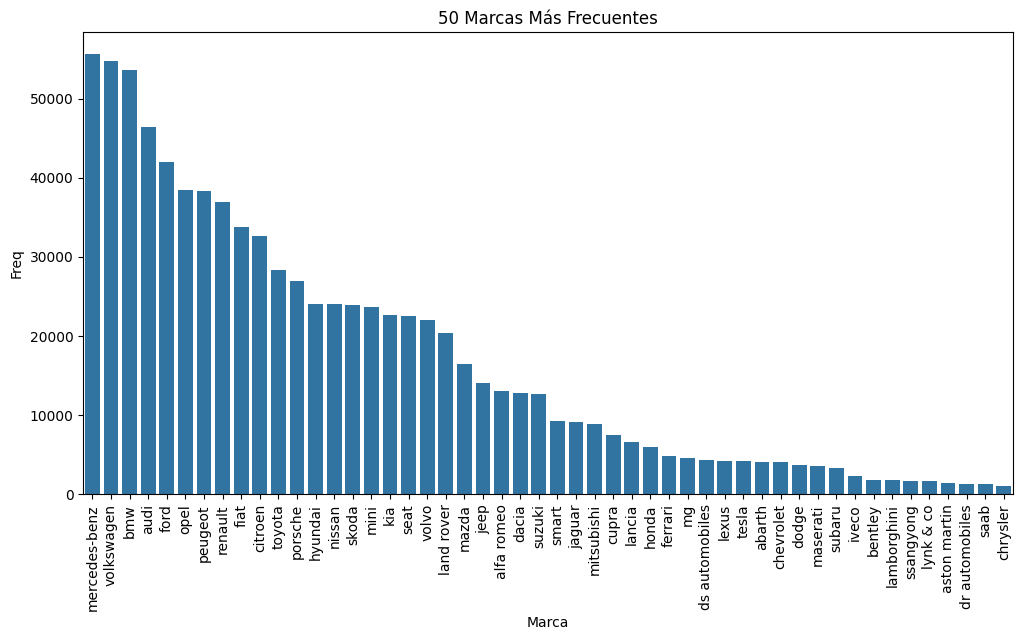

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ordenar la tabla por precio medio de mayor a menor
pivot_table_sorted = pivot_table.sort_values(("Precio", "count"), ascending=False)
pivot_table_sorted
# Generar el plot de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=pivot_table_sorted, x=pivot_table_sorted.index, y=("Precio", "count"))

# Ajustes del gráfico
plt.xticks(rotation=90)
plt.ylabel("Freq")
plt.xlabel("Marca")
plt.title("50 Marcas Más Frecuentes")

plt.show()

In [32]:

import pandas as pd

# Crear la pivot table con métricas de agregación
pivot_table = df.pivot_table(index='Automatico/Manual', 
                                      aggfunc={'Precio': ['mean', 'median', 'count']})

# Mostrar la tabla resultante
print(pivot_table)

                   Precio                       
                    count          mean   median
Automatico/Manual                               
0 Transmision       13147  29037.860577  14500.0
Automatico         405286  41655.933378  26990.0
Manual             427436  19594.252113  10600.0
Semiautomatico      15565  30518.863990  18000.0


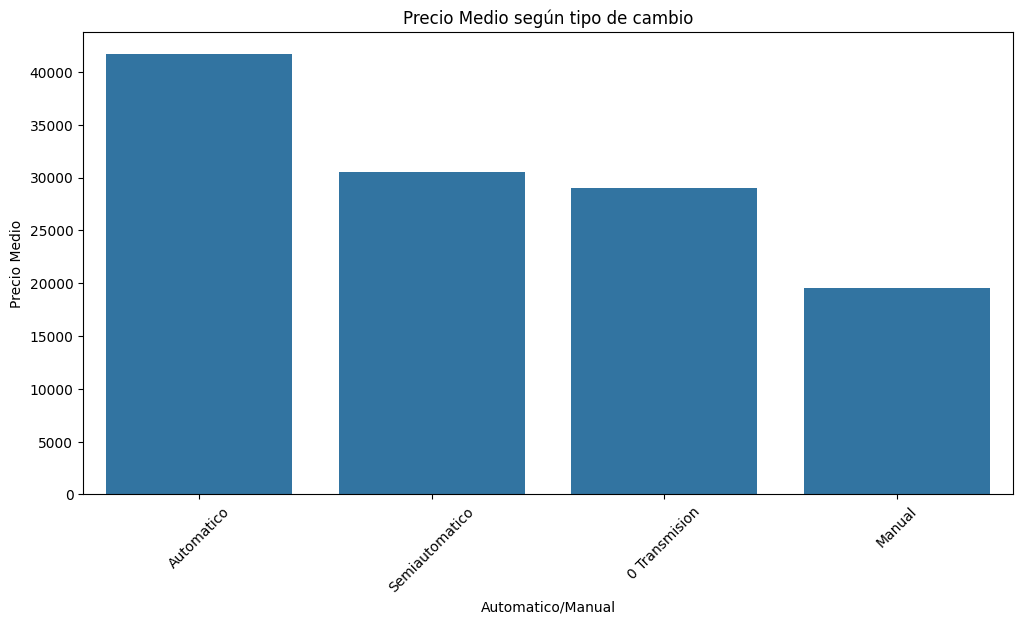

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ordenar la tabla por precio medio de mayor a menor
pivot_table_sorted = pivot_table.sort_values(("Precio", "mean"), ascending=False)
pivot_table_sorted
# Generar el plot de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=pivot_table_sorted, x=pivot_table_sorted.index, y=("Precio", "mean"))

# Ajustes del gráfico
plt.xticks(rotation=45)
plt.ylabel("Precio Medio")
plt.xlabel("Automatico/Manual")
plt.title("Precio Medio según tipo de cambio")

plt.show()

In [34]:
import pandas as pd

# Crear la pivot table con métricas de agregación
pivot_table = df.pivot_table(index='Pais', 
                                      aggfunc={'Precio': ['mean', 'median', 'count']})

# Mostrar la tabla resultante
print(pivot_table)

      Precio                       
       count          mean   median
Pais                               
A      71896  28723.337181  20980.0
B      88125  26926.640386  17390.0
D     214424  29327.091837  15700.0
E      71777  39243.574098  18990.0
F      61283  36690.350130  22000.0
I     196145  26336.690469  14900.0
L       5940  45664.767003  30990.0
NL    151844  32176.885784  15900.0


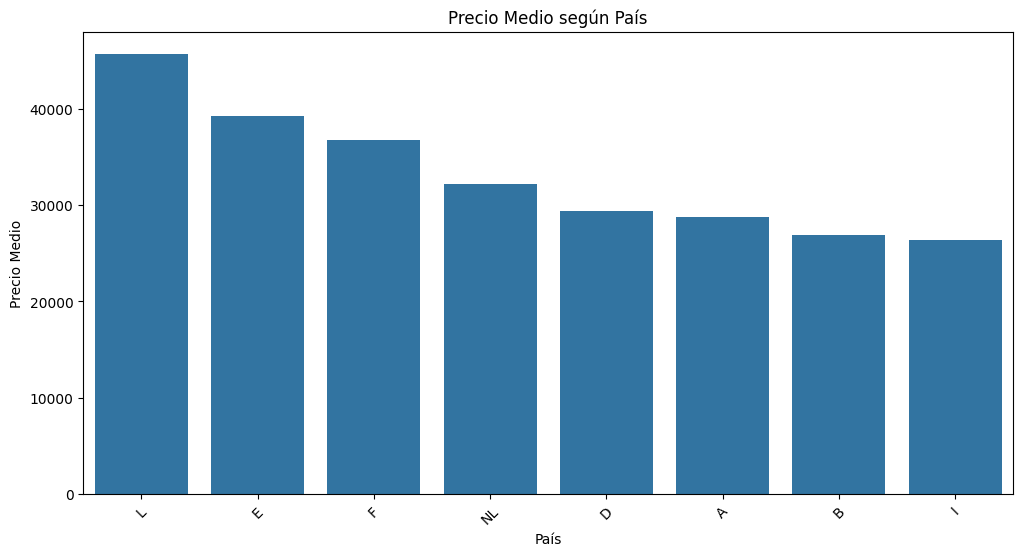

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ordenar la tabla por precio medio de mayor a menor
pivot_table_sorted = pivot_table.sort_values(("Precio", "mean"), ascending=False)
pivot_table_sorted
# Generar el plot de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=pivot_table_sorted, x=pivot_table_sorted.index, y=("Precio", "mean"))

# Ajustes del gráfico
plt.xticks(rotation=45)
plt.ylabel("Precio Medio")
plt.xlabel("País")
plt.title("Precio Medio según País")

plt.show()

In [36]:
import pandas as pd

#  Seleccionar las 20 marcas más frecuentes
top_brands = df['Modelo'].value_counts().nlargest(50).index

# Filtrar el dataframe con solo las marcas más frecuentes
df_filtered = df[df['Modelo'].isin(top_brands)]

# Crear la pivot table con métricas de agregación
pivot_table = df_filtered.pivot_table(index='Modelo', 
                                      aggfunc={'Precio': ['mean', 'median', 'count']})

# Mostrar la tabla resultante
print(pivot_table)

                   Precio                         
                    count           mean    median
Modelo                                            
2008                 5261   16555.497244   15995.0
208                  6235  174086.217482   12690.0
3008                 4681   20065.273019   18500.0
308                  5581   15056.113241   10990.0
320                  5164   15950.738962   11294.5
500                  8172   11486.062286   10494.5
911                  4023  122340.940840  101911.0
Desconocido          9814   48498.400245   22000.0
a1                   3812   17339.665005   15500.0
a3                   8330   18291.687875   15490.0
a4                   7103   15431.108827   11990.0
a6                   4587   21657.078047   16999.0
arona                3843   18790.200364   18500.0
astra                7821   12003.945531    7950.0
c3                   7892   10688.660162   10490.0
c4                   3491   15390.264108   14990.0
captur               4614   169

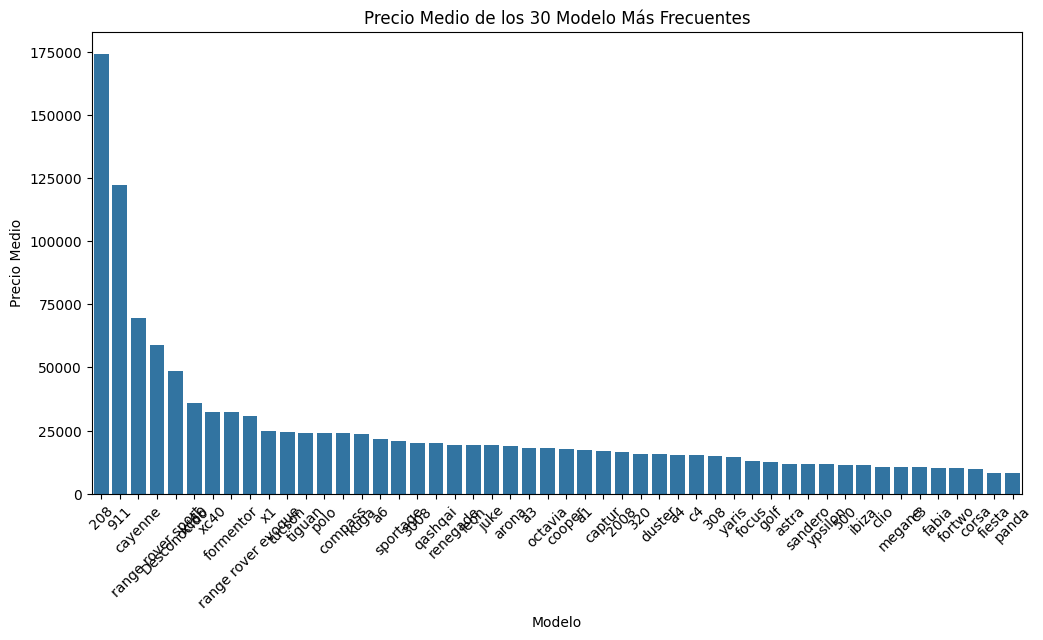

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ordenar la tabla por precio medio de mayor a menor
pivot_table_sorted = pivot_table.sort_values(("Precio", "mean"), ascending=False)
pivot_table_sorted
# Generar el plot de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=pivot_table_sorted, x=pivot_table_sorted.index, y=("Precio", "mean"))

# Ajustes del gráfico
plt.xticks(rotation=45)
plt.ylabel("Precio Medio")
plt.xlabel("Modelo")
plt.title("Precio Medio de los 30 Modelo Más Frecuentes")

plt.show()            

In [38]:

print(df[df["Modelo"] == '208'].head())


      Pais          Marca Modelo  Precio  Kilometros Automatico/Manual  \
5834     B  mercedes-benz    208    4500      154045     0 Transmision   
36241    B        ferrari    208   82000       38000            Manual   
76286    B        peugeot    208    4638       75000            Manual   
76425    B        peugeot    208    7500      165800        Automatico   
76545    B        peugeot    208    5500      100964            Manual   

      Fabricacion Combustible   kW   CV  
5834   2005-11-01      Diesel   60   82  
36241  1988-09-01    Gasolina  187  254  
76286  2003-03-01    Gasolina   50   68  
76425  2006-06-01    Gasolina   55   75  
76545  2008-06-01      Diesel   73   99  


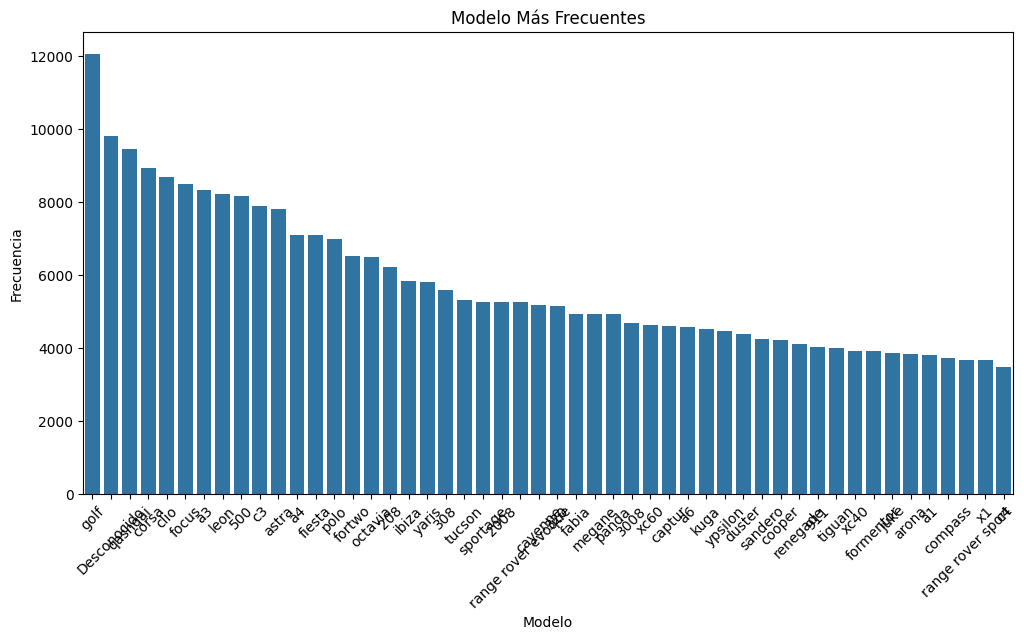

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ordenar la tabla por precio medio de mayor a menor
pivot_table_sorted = pivot_table.sort_values(("Precio", "count"), ascending=False)
pivot_table_sorted
# Generar el plot de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=pivot_table_sorted, x=pivot_table_sorted.index, y=("Precio", "count"))

# Ajustes del gráfico
plt.xticks(rotation=45)
plt.ylabel("Frecuencia")
plt.xlabel("Modelo")
plt.title("Modelo Más Frecuentes")

plt.show()    

#### Data cleaning & Transformaciones


- modelos poco frecuentes
- convertir fecha en años
- eliminar Kw o CV
- filtrar por años (ej. mi modelo predice para vehiculos de <20 años
- discretizar potencia
- discretizar Km
- quitar ouliers del precio
- transf log del precio
- discretizar precio?
- 
- agrupar modelos y marcas poco frecuentes?

In [194]:
df=df = pd.read_csv(file, delimiter=';', low_memory=False)
df.shape

(861434, 10)

In [195]:
df

,Pais,Marca,Modelo,Precio,Kilometros,Automatico/Manual,Fabricacion,Combustible,kW,CV
0,E,mercedes-benz,Desconocido,41500,10298,Manual,1935-01-01,Gasolina,29,39
1,E,mercedes-benz,220,30000,15000,Manual,1952-01-01,Gasolina,78,106
2,E,mercedes-benz,190,155000,9000,0 Transmision,1958-12-01,Gasolina,81,110
3,E,mercedes-benz,220,24900,89000,0 Transmision,1962-09-01,Gasolina,120,163
4,E,mercedes-benz,220,44900,71800,0 Transmision,1963-09-01,Gasolina,120,163
...,...,...,...,...,...,...,...,...,...,...
861429,L,tesla,model s,42980,60750,Automatico,2018-03-01,Electrico,310,421
861430,L,tesla,model s,52900,77900,Automatico,2019-12-01,Electrico,568,772
861431,L,tesla,model x,111900,8817,Automatico,2022-12-01,Electrico,750,1020
861432,L,tesla,model y,30000,70800,Automatico,2023-02-01,Electrico,220,299


#### fechas

In [196]:
df['fecha'] = pd.to_datetime(df['Fabricacion'], format='%Y-%m-%d', errors='coerce')

In [197]:
df['fecha'] = df['fecha'].dt.year
df['fecha'].value_counts()

fecha
2024    110548
2023     64436
2019     54919
2021     54602
2022     54528
         ...  
1946         9
1942         8
1943         6
1944         5
1945         3
Name: count, Length: 96, dtype: int64

In [198]:
df.drop(columns=['Fabricacion'], inplace=True)

In [199]:
import pandas as pd

# Crear la pivot table con métricas de agregación
pivot_table = df.pivot_table(index='fecha', 
                                      aggfunc={'Precio': ['mean', 'median', 'count']})

# Mostrar la tabla resultante
print(pivot_table)

       Precio                        
        count           mean   median
fecha                                
1929       33  240021.181818  36000.0
1930       19   36967.631579  28900.0
1931       16  161193.750000  39500.0
1932       10   45085.000000  33975.0
1933       17   69835.294118  40000.0
...       ...            ...      ...
2020    53711   30069.632980  20930.0
2021    54602   34705.253086  22990.0
2022    54528   40987.102259  25890.0
2023    64436   44032.483270  29200.0
2024   110548   56591.684128  34490.0

[96 rows x 3 columns]


In [200]:
df= df[df["fecha"] > 2000]
df.shape


(815731, 10)

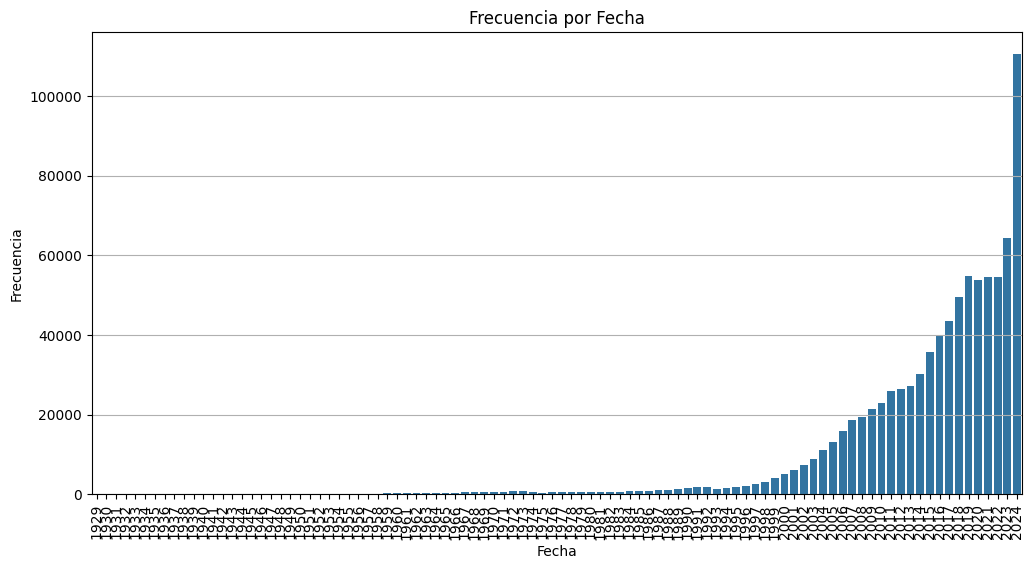

In [201]:

import matplotlib.pyplot as plt
import seaborn as sns

# Ordenar la tabla por fecha de mayor a menor
pivot_table_sorted = pivot_table.sort_index(ascending=True)

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=pivot_table_sorted.index, y=pivot_table_sorted[("Precio", "count")])

# Ajustes del gráfico
plt.xticks(rotation=90)
plt.xlabel("Fecha")
plt.ylabel("Frecuencia")
plt.title("Frecuencia por Fecha")
plt.grid(axis="y")

plt.show()


#### Modelos de auto

In [202]:
import pandas as pd

# Contar la frecuencia de cada valor en "Modelo"
modelo_counts = df["Modelo"].value_counts()

# Definir las categorías a mantener (frecuencia mayor a 200)
categorias_validas = modelo_counts[modelo_counts > 200].index

# Recodificar la variable, asignando "Otros" a los valores menos frecuentes
df["Modelo_recodificado"] = df["Modelo"].apply(lambda x: x if x in categorias_validas else "Otros")

# Verificar el resultado
print(df["Modelo_recodificado"].value_counts())


Modelo_recodificado
Otros       61010
golf        10868
qashqai      9461
corsa        8726
clio         8533
            ...  
celerio       202
c 43 amg      202
pixo          202
z3            202
x-type        201
Name: count, Length: 581, dtype: int64


C:\Users\tomas\AppData\Local\Temp\ipykernel_8880\999912078.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Modelo_recodificado"] = df["Modelo"].apply(lambda x: x if x in categorias_validas else "Otros")


In [203]:
df.shape

(815731, 11)

In [207]:
# Filtrar el dataframe eliminando filas con "Modelo_recodificado" = "Desconocido"
df = df[df["Modelo_recodificado"] != "Desconocido"]
df.shape

(808245, 10)

In [208]:
df.drop(columns=["Modelo"], inplace=True)
df.shape

KeyError: "['Modelo'] not found in axis"

In [209]:
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808245 entries, 0 to 808244
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Pais                 808245 non-null  object
 1   Marca                808245 non-null  object
 2   Precio               808245 non-null  int64 
 3   Kilometros           808245 non-null  int64 
 4   Automatico/Manual    808245 non-null  object
 5   Combustible          808245 non-null  object
 6   kW                   808245 non-null  int64 
 7   CV                   808245 non-null  int64 
 8   fecha                808245 non-null  int32 
 9   Modelo_recodificado  808245 non-null  object
dtypes: int32(1), int64(4), object(5)
memory usage: 58.6+ MB


#### Marca 

In [210]:
import pandas as pd

# Contar la frecuencia de cada valor en "Modelo"
marca_counts = df["Marca"].value_counts()

# Definir las categorías a mantener (frecuencia mayor a 50)
categorias_validas = marca_counts[marca_counts > 100].index

# Recodificar la variable, asignando "Otros" a los valores menos frecuentes
df["Marca_recodificado"] = df["Marca"].apply(lambda x: x if x in categorias_validas else "Otros")

# Verificar el resultado
print(df["Marca_recodificado"].value_counts())

Marca_recodificado
volkswagen       49374
bmw              49239
mercedes-benz    47768
audi             44841
ford             40284
                 ...  
chatenet           119
xev                107
omoda              107
emc                106
great wall         105
Name: count, Length: 88, dtype: int64


In [211]:
df.drop(columns=["Marca"], inplace=True)
df.shape

(808245, 10)

In [212]:
df

,Pais,Precio,Kilometros,Automatico/Manual,Combustible,kW,CV,fecha,Modelo_recodificado,Marca_recodificado
0,E,5500,308800,Automatico,Gasolina,200,272,2001,Otros,mercedes-benz
1,E,7990,85500,Manual,Gasolina,120,163,2001,slk 200,mercedes-benz
2,E,16900,152396,Automatico,Gasolina,225,306,2001,sl 500,mercedes-benz
3,E,3300,95000,Automatico,Diesel,70,95,2001,a 170,mercedes-benz
4,E,3200,173000,Automatico,Gasolina,165,224,2001,Otros,mercedes-benz
...,...,...,...,...,...,...,...,...,...,...
808240,L,42980,60750,Automatico,Electrico,310,421,2018,model s,tesla
808241,L,52900,77900,Automatico,Electrico,568,772,2019,model s,tesla
808242,L,111900,8817,Automatico,Electrico,750,1020,2022,model x,tesla
808243,L,30000,70800,Automatico,Electrico,220,299,2023,model y,tesla


In [213]:
# recalculo las variables numercias y vategoricas
vbles = tipo_variables(df)
num_vbles =vbles[0]
cat_vbles = vbles[1]

print(cat_vbles)
print(num_vbles)

['Pais', 'Automatico/Manual', 'Combustible', 'Modelo_recodificado', 'Marca_recodificado']
['Precio', 'Kilometros', 'kW', 'CV', 'fecha']


In [214]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[num_vbles])

# Convertir el resultado en un DataFrame con los mismos nombres de columnas
df_scaled = pd.DataFrame(df_scaled, columns=num_vbles, index=df.index)

#  Unir el dataframe escalado al original (reemplazando las variables originales)
df[num_vbles] = df_scaled

#  Verificar el resultado
print(df.head())

#encoded_df = pd.DataFrame(encoded_data, columns=column_names, index=df.index)

  Pais    Precio  Kilometros Automatico/Manual Combustible        kW  \
0    E -0.019155    1.522255        Automatico    Gasolina  0.907974   
1    E -0.017171   -0.070322            Manual    Gasolina -0.017704   
2    E -0.010073    0.406781        Automatico    Gasolina  1.197248   
3    E -0.020908   -0.002568        Automatico      Diesel -0.596253   
4    E -0.020988    0.553729        Automatico    Gasolina  0.502990   

         CV     fecha Modelo_recodificado Marca_recodificado  
0  0.908155 -2.629967               Otros      mercedes-benz  
1 -0.019648 -2.629967             slk 200      mercedes-benz  
2  1.197562 -2.629967              sl 500      mercedes-benz  
3 -0.598461 -2.629967               a 170      mercedes-benz  
4  0.499581 -2.629967               Otros      mercedes-benz  


In [215]:
df

,Pais,Precio,Kilometros,Automatico/Manual,Combustible,kW,CV,fecha,Modelo_recodificado,Marca_recodificado
0,E,-0.019155,1.522255,Automatico,Gasolina,0.907974,0.908155,-2.629967,Otros,mercedes-benz
1,E,-0.017171,-0.070322,Manual,Gasolina,-0.017704,-0.019648,-2.629967,slk 200,mercedes-benz
2,E,-0.010073,0.406781,Automatico,Gasolina,1.197248,1.197562,-2.629967,sl 500,mercedes-benz
3,E,-0.020908,-0.002568,Automatico,Diesel,-0.596253,-0.598461,-2.629967,a 170,mercedes-benz
4,E,-0.020988,0.553729,Automatico,Gasolina,0.502990,0.499581,-2.629967,Otros,mercedes-benz
...,...,...,...,...,...,...,...,...,...,...
808240,L,0.010704,-0.246840,Automatico,Electrico,2.180781,2.176437,0.192171,model s,tesla
808241,L,0.018607,-0.124526,Automatico,Electrico,5.166093,5.164134,0.358179,model s,tesla
808242,L,0.065612,-0.617226,Automatico,Electrico,7.272010,7.275099,0.856204,model x,tesla
808243,L,0.000363,-0.175163,Automatico,Electrico,1.139393,1.137978,1.022212,model y,tesla


In [217]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

#  Crear el OneHotEncoder con salida dispersa
encoder = OneHotEncoder(sparse_output=True)

#  Iterar sobre las variables categóricas
for i in cat_vbles:
    
    #  Aplicar la transformación OneHotEncoding
    encoded_data = encoder.fit_transform(df[[i]])  # Matriz dispersa

    # Obtener los nombres de las nuevas columnas
    column_names = encoder.get_feature_names_out([i])

    #  Convertir la matriz dispersa a DataFrame antes de concatenar
    encoded_df = pd.DataFrame(encoded_data.toarray(), columns=column_names, index=df.index)

    # Concatenar el DataFrame codificado con el original
    df = pd.concat([df, encoded_df], axis=1)

# Mostrar los primeros registros del dataframe actualizado
df.head()


MemoryError: Unable to allocate 3.49 GiB for an array with shape (808245, 580) and data type float64

In [129]:
# Create a OneHotEncoder object
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Iterate over categorical variables
for i in cat_vbles:

# Encode the column

    encoded_data = encoder.fit_transform(df[[i]])
    column_names = encoder.get_feature_names_out([i])

 # Create a DataFrame for the encoded data

    encoded_df = pd.DataFrame(encoded_data, columns=column_names, index=df.index)
 
 # Concatenate the encoded DataFrame with the original DataFrame
    df = pd.concat([df, encoded_df], axis=1)


df.head()

MemoryError: Unable to allocate 4.12 GiB for an array with shape (649, 851620) and data type float64

In [128]:
df

,Pais,Precio,Kilometros,Automatico/Manual,Combustible,kW,CV,fecha,Modelo_recodificado,Marca_recodificado
0,E,-0.000078,-0.584473,Manual,Gasolina,-0.492448,-0.493562,-7.038192,220,mercedes-benz
1,E,0.091618,-0.626862,0 Transmision,Gasolina,-0.457931,-0.459707,-6.372002,190,mercedes-benz
2,E,-0.003819,-0.061673,0 Transmision,Gasolina,-0.009209,-0.011124,-5.927875,220,mercedes-benz
3,E,0.010852,-0.183189,0 Transmision,Gasolina,-0.009209,-0.011124,-5.816843,220,mercedes-benz
4,E,-0.020251,0.482321,0 Transmision,Gasolina,0.520053,0.522098,-5.483748,e 320,mercedes-benz
...,...,...,...,...,...,...,...,...,...,...
851615,L,0.009444,-0.261256,Automatico,Electrico,2.176872,2.172546,0.289901,model s,tesla
851616,L,0.016721,-0.140093,Automatico,Electrico,5.145340,5.143351,0.400933,model s,tesla
851617,L,0.060001,-0.628155,Automatico,Electrico,7.239375,7.242382,0.734028,model x,tesla
851618,L,-0.000078,-0.190254,Automatico,Electrico,1.141360,1.139958,0.845059,model y,tesla


In [56]:
# Separamos el data set
df.shape

(851620, 750)

In [57]:
df.isnull().sum()

Pais                             0
Precio                           0
Kilometros                       0
Automatico/Manual                0
Combustible                      0
                                ..
Marca_recodificado_toyota        0
Marca_recodificado_triumph       0
Marca_recodificado_volkswagen    0
Marca_recodificado_volvo         0
Marca_recodificado_xev           0
Length: 750, dtype: int64

In [58]:
y = df['Precio']
X= df.drop(columns='Precio')

In [59]:
# transformar la variables numericas

In [60]:
# borramos las categoricas
def tipo_variables(X):
    dtypes = df.dtypes
    categorical_cols = []
    numerical_cols = []
    for col, dtype in dtypes.items():
        if pd.api.types.is_numeric_dtype(dtype):
            numerical_cols.append(col)
        else:
            categorical_cols.append(col)
    return numerical_cols, categorical_cols
    
vbles = tipo_variables(df)
num_vbles =vbles[0]
cat_vbles = vbles[1]

print(cat_vbles)
print(num_vbles)


['Pais', 'Automatico/Manual', 'Combustible', 'Modelo_recodificado', 'Marca_recodificado']
['Precio', 'Kilometros', 'kW', 'CV', 'fecha', 'Pais_A', 'Pais_B', 'Pais_D', 'Pais_E', 'Pais_F', 'Pais_I', 'Pais_L', 'Pais_NL', 'Automatico/Manual_0 Transmision', 'Automatico/Manual_Automatico', 'Automatico/Manual_Manual', 'Automatico/Manual_Semiautomatico', 'Combustible_0 Tipo de combustible', 'Combustible_Diesel', 'Combustible_Electrico', 'Combustible_Electro/Diesel', 'Combustible_Electro/Gasolina', 'Combustible_Etanol', 'Combustible_Gas licuado (GLP)', 'Combustible_Gas natural (CNG)', 'Combustible_Gasolina', 'Combustible_Hidrogeno', 'Combustible_Otros', 'Modelo_recodificado_09-mar', 'Modelo_recodificado_1', 'Modelo_recodificado_107', 'Modelo_recodificado_108', 'Modelo_recodificado_114', 'Modelo_recodificado_116', 'Modelo_recodificado_118', 'Modelo_recodificado_120', 'Modelo_recodificado_124 spider', 'Modelo_recodificado_135', 'Modelo_recodificado_147', 'Modelo_recodificado_156', 'Modelo_recodifi

In [61]:
X.drop(columns=cat_vbles, inplace=True)

In [62]:
X

,Kilometros,kW,CV,fecha,Pais_A,Pais_B,Pais_D,Pais_E,Pais_F,Pais_I,...,Marca_recodificado_smart,Marca_recodificado_ssangyong,Marca_recodificado_subaru,Marca_recodificado_suzuki,Marca_recodificado_tesla,Marca_recodificado_toyota,Marca_recodificado_triumph,Marca_recodificado_volkswagen,Marca_recodificado_volvo,Marca_recodificado_xev
0,15000,78,106,1952,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9000,81,110,1958,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,89000,120,163,1962,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,71800,120,163,1963,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,166000,166,226,1966,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
851615,60750,310,421,2018,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
851616,77900,568,772,2019,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
851617,8817,750,1020,2022,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
851618,70800,220,299,2023,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [63]:
#df0 = pd.read_csv(file, delimiter=';', low_memory=False)

In [64]:
#df_bkp.loc[851529]

In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [66]:
X

array([[-0.58447294, -0.49244758, -0.49356233, ..., -0.26124032,
        -0.162536  , -0.01120976],
       [-0.62686211, -0.45793051, -0.45970699, ..., -0.26124032,
        -0.162536  , -0.01120976],
       [-0.06167325, -0.00920866, -0.01112377, ..., -0.26124032,
        -0.162536  , -0.01120976],
       ...,
       [-0.62815498,  7.23937514,  7.24238236, ..., -0.26124032,
        -0.162536  , -0.01120976],
       [-0.19025371,  1.1413602 ,  1.13995772, ..., -0.26124032,
        -0.162536  , -0.01120976],
       [-0.45377302,  2.82119073,  2.82426077, ..., -0.26124032,
        -0.162536  , -0.01120976]], shape=(851620, 744))

In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
from sklearn import linear_model
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn import metrics 


In [69]:
lm = LinearRegression()
lm.fit(X_train, y_train)


LinearRegression()

In [70]:
lm_y_pred=lm.predict(X_test)

In [71]:
print('MAE:', metrics.mean_absolute_error(y_test, lm_y_pred))
print('MSE:', metrics.mean_squared_error(y_test, lm_y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lm_y_pred)))
print('R2:', metrics.r2_score(y_test, lm_y_pred))



MAE: 16876.616340516182
MSE: 1816021249999.2383
RMSE: 1347598.3266534721
R2: 0.0005650745748749797


In [72]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

#  Definir el modelo XGBoost
xgb_model = XGBRegressor(objective="reg:squarederror", n_estimators=100, learning_rate=0.1, max_depth=6)

#  Entrenar el modelo con los datos de entrenamiento
xgb_model.fit(X_train, y_train)

# Hacer predicciones en los datos de prueba (si tienes X_test)
y_pred = xgb_model.predict(X_test)

# Calcular error (MSE)
# Evaluar el modelo
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test, y_pred))


MAE: 14681.3037109375
MSE: 2882574221312.0
RMSE: 1697814.542673021
R2: -0.5864048004150391


In [73]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import plot_tree


# Create a Decision Tree Regressor

dt_regressor = DecisionTreeRegressor(random_state=42)

# Fit the model to the training data

dt_regressor.fit(X_train, y_train)

# Make predictions on the test set

dt_y_pred = dt_regressor.predict(X_test)

# Evaluate the model

print('MAE:', metrics.mean_absolute_error(y_test, dt_y_pred))
print('MSE:', metrics.mean_squared_error(y_test, dt_y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dt_y_pred)))
print('R2:', metrics.r2_score(y_test, dt_y_pred))

MAE: 9764.823671130867
MSE: 1933629019215.441
RMSE: 1390549.8981393804
R2: -0.0641595601484577


In [74]:
# KNN Regressor

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score




# Create a KNN Regressor

knn_regressor = KNeighborsRegressor()

# Fit the model to the training data

knn_regressor.fit(X_train, y_train)


# Make predictions on the test set

knn_y_pred = knn_regressor.predict(X_test)


# Evaluate the model

print('MAE:', metrics.mean_absolute_error(y_test, knn_y_pred))
print('MSE:', metrics.mean_squared_error(y_test, knn_y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, knn_y_pred)))
print('R2:', metrics.r2_score(y_test, knn_y_pred))

MAE: 9937.925691035909
MSE: 2061375209507.7073
RMSE: 1435749.0064449662
R2: -0.13446380585491546
